Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", 
as well as your name(s) and group number in the cell below:

In [1]:
NAMES = "Ludwig Lewis & Erik Dahllöf"                # fill in your name(s) between the quotes, comma separated if more than one
GROUP = "45"                # fill in your group number between the quotes

---

# LP4 Finals

# Problem 1 (10 pt): Errors

As you have seen during the lectures and exercises, sometimes it is best to rewrite functions to avoid for example catastrophic cancellation. 
Rewrite the following expressions in order to evaluate them for large values of $x$. 

1) $\bf \sqrt{x+1}-\sqrt{x}$

2) $\bf {1\over{x+1}} - {2\over{x}} + {1\over{x-1}}$

3) $\bf {1\over{\sqrt{x}}} - {1\over{\sqrt{x+1}}}$

- Define and test the before and after functions in python.
- Plot the three functions in a three panel plot for the range ${\bf xs}$ defined below. Do not forget to import the required packages.

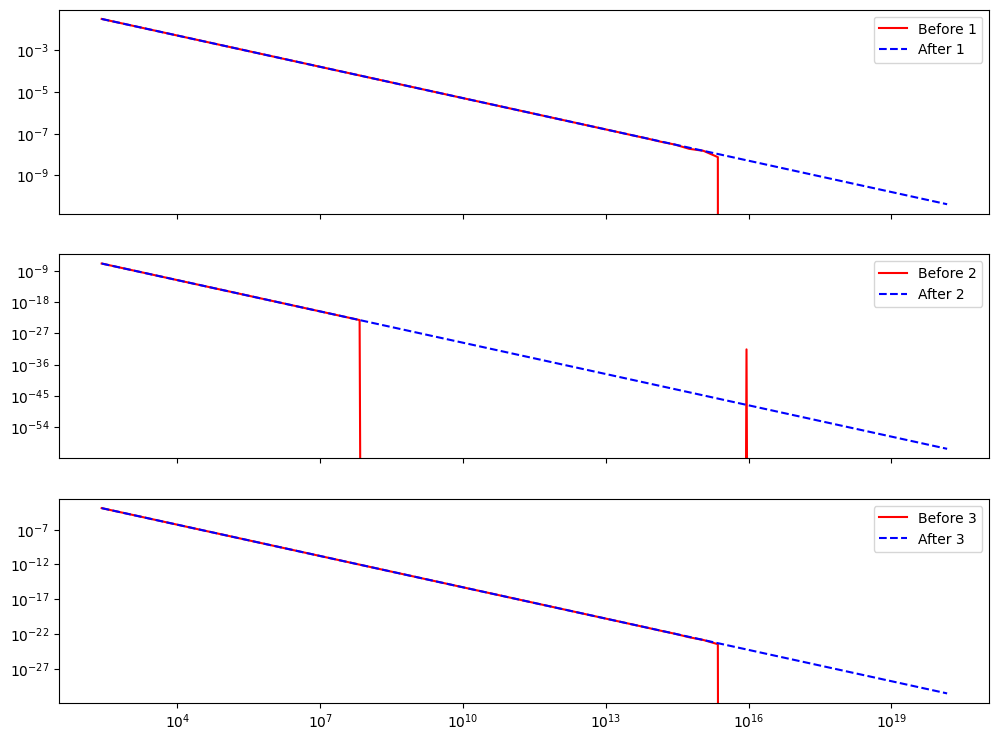

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
large = sys.maxsize
xs=np.array([2.**i*large for i in range(-55,5)])

def before_1(x):
    return np.sqrt(x+1) - np.sqrt(x)

def after_1(x):
    return 1/(np.sqrt(x+1)+np.sqrt(x))

def before_2(x):
    return 1/(x+1) - 2/(x) + 1/(x-1)

def after_2(x):
    return 2/(x**3-x)

def before_3(x):
    return 1/np.sqrt(x) - 1/np.sqrt(x+1)

def after_3(x):
    return 1/(x*np.sqrt(x+1)+ np.sqrt(x)*(x+1))
functions = [[before_1,after_1],[before_2,after_2],[before_3,after_3]]
fig, axs = plt.subplots(3,1,figsize=(12,9),sharex=True)

for i,funcpair in enumerate(functions):
    axs[i].plot(xs,funcpair[0](xs), c='r', label=f'Before {i+1}'.format())
    axs[i].plot(xs,funcpair[1](xs),'--', c='b', label=f'After {i+1}'.format())
    axs[i].legend()
    axs[i].loglog()

# Problem 2: Differentiation

You have a data set of the following values $\bf V=[1,4,6]$ for a measured volume of water (in liters) at $\bf t=[1,2,5]$. You want to estimate the rate of change $\bf q$ in your volume of water at $\bf t=2$ (meaning that you want to determine the derivative $\bf q=dV/dt$ at time $\bf t=2$).

## Problem 2a (6 pt):

- Estimate, **without using ```np.gradient```**, the value for $\bf q(t=2)$. Use the information in all three data points (so for all three times $\bf t=[1,2,5]$) to get the best estimate of $\bf q$. Write the analytical formula you used in a Markdown Box and implement it in a function that can take the arrays of data and time as an input.

[Hint: as you can see, the spacing in time is not equal. By using a *weighted* combination of the forward and backward methods (similar to our derivation of the central method, where we took the unweighted average), you can derive a function for the approximation of $\bf q$ ($\bf \tilde q$) that depends on $\bf V(t=1), V(t=2), $and $\bf V(t=5)$.]

- Then include in your code the forward method to approximate the value of $\bf q$ at $\bf t=1$ and the backward method to approximate $\bf q$ at $\bf t=5$

YOUR ANSWER HERE 
$f'(t)= \left((f(t)-f(t-h_l))\cdot \frac{h_r}{h_l} + (f(t+h_r)-f(t)) \cdot \frac{h_l}{h_r}\right) \cdot \frac{1}{h_r+h_l}$

In [3]:
import numpy as np
data=np.array([1,4,6])
t=np.array([1,2,5])
# YOUR CODE HERE
q = np.zeros(3)
q[1] = ((t[2]-t[1])*(data[1]-data[0])/(t[1]-t[0]) + (t[1]-t[0])*(data[2]-data[1])/(t[2]-t[1]))/(t[2]-t[0])
def weighted_derive(t,data):
    assert len(t) == len(data)
    q = np.zeros(len(t))
    q[0] = (data[1]-data[0])/(t[1]-t[0])
    q[-1] = (data[-1]-data[-2])/(t[-1]-t[-2])
    for i in range(1,len(q)-1):
        q[i] = ((t[i+1]-t[i])*(data[i]-data[i-1])/(t[i]-t[i-1]) + (t[i]-t[i-1])*(data[i+1]-data[i])/(t[i+1]-t[i]))/(t[i+1]-t[i-1])
    return q
q = weighted_derive(t,data)
print(q)

[3.         2.41666667 0.66666667]


## Problem 2b (3 pt):

- Then calculate $q$ using ```np.gradient``` and check how close your result is to the best approximation (the result should be $2.4166$ using np.gradient; you might have been able to reproduce this exactly, but if your approximation is between $1.8$ and $3.0$ it is good enough).
- If there is a difference between your result and the result from ```np.gradient``` explain why you think there is a difference (also if your result is still between 1.8 and 3.0!).


In [4]:
# YOUR CODE HERE
numpy_q = np.gradient(data,t)
print(numpy_q)


[3.         2.41666667 0.66666667]


YOUR ANSWER HERE

## Problem 2c (5 pt):
- Finally, using ```matplotlib```, make a plot of the three data points and also draw the tangent (the straight line that touches the data point with a slope equal to the derivative) for the three points derived with ```np.gradient``` and with your own method in 2a.

C:\Users\erikd\AppData\Local\Temp\ipykernel_17552\1218157118.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x,numpy_q[i]*x + data[i]-t[i]*numpy_q[i],'--',linestyle = (0, (1, 2)),label='Numpy tangents')


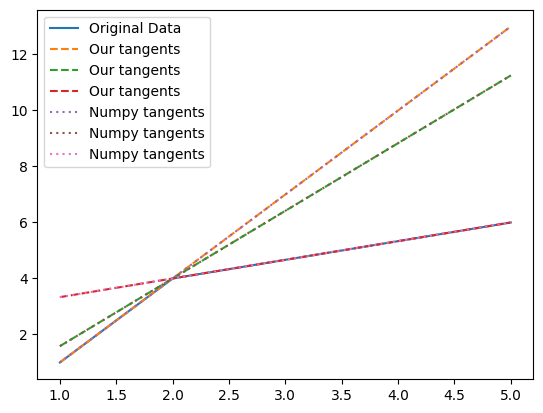

In [5]:
# YOUR CODE HERE

        

plt.plot(t,data ,label = 'Original Data')
x= np.linspace(t[0],t[2])
for i in range(3):
    plt.plot(x,q[i]*x + data[i]-t[i]*q[i],'--',label='Our tangents')
for i in range(3):
    plt.plot(x,numpy_q[i]*x + data[i]-t[i]*numpy_q[i],'--',linestyle = (0, (1, 2)),label='Numpy tangents')
plt.legend()
plt.show()


# Problem 3: Solving systems of linear equations

This problem is about saving memory needs while doing LU-decomposition.

## Problem 3a (6 pt):
The LU-decomposition returns two matrices $\pmb{L}$ and $\pmb{U}$. To save some memory, these lower and upper triangular matrices could be stored into one single matrix $\pmb{M}$ (note that the ones in the diagonal of $\pmb{L}$ are not in $\pmb{M}$ anymore).

$$
\textrm{Instead of storing }\pmb{L}=
\begin{pmatrix}
1 & 0 & 0 & 0\\
L & 1 & 0 & 0\\
L & L & 1 & 0\\
L & L & L& 1\\
\end{pmatrix}
\textrm{ and } \pmb{U}=
\begin{pmatrix}
U & U & U & U\\
0 & U & U & U\\
0 & 0 & U & U\\
0 & 0 & 0 & U\\
\end{pmatrix}
\textrm{ we only store } \pmb{M}=
\begin{pmatrix}
U & U & U & U\\
L & U & U & U\\
L & L & U & U\\
L & L & L & U\\
\end{pmatrix}
$$

Modify the LU-decomposition function ```ludec``` seen in the lecture so that it returns only one matrix $\pmb{M}$. Creating $\pmb{L}$ and $\pmb{U}$ separately and just merging them together into $\pmb{M}$ is not accepted. Ensure that your $\pmb{M}$ matrix is indeed a combination of $\pmb{L}$ and $\pmb{U}$ obtained with the orignal ```ludec``` function.

In [6]:
# Matrix creation
def testcreate(n,val):
    A = np.arange(val,val+n*n).reshape(n,n)
    A = np.sqrt(A)
    bs = (A[0,:])**2.1
    return A, bs
A, _ = testcreate(4, 21)

# 3a
# YOUR CODE HERE
from SEE125_eig_lib import ludec , forsub, backsub
def modified_ludec(A):
    n = A.shape[0]
    M = np.copy(A)
    for j in range(n-1):
        for i in range(j+1,n):
            coeff = M[i,j]/M[j,j]
            M[i,j:] -= coeff*M[j,j:]
            M[i,j] = coeff
    return M
original = ludec(A)
assert (original[0] - np.identity(A.shape[0]) + original[1] == modified_ludec(A)).all

## Problem 3b (5 pt):
Now write a function to solve a system of linear equations using your modified LU-decomposition, thus handling a single $\pmb{M}$ matrix. This function is a modified version of ```lusolve```, seen in the lecture.

In [7]:
# 3b
# YOUR CODE HERE
def lusolve(A, b):
    M = modified_ludec(A)
    y = forsub(np.tril(M,-1)+ np.identity(M.shape[0]), b)
    x = backsub(np.triu(M), y)
    return x

## Problem 3c (4 pt):
Test your function on the given system $\pmb{Ax}=\pmb{b}$. Compare your results with those obtained with the appropriate numpy function.

In [8]:
# 3c
A, b = testcreate(4, 21)  # the A and b in Ax = b
# YOUR CODE HERE
print(lusolve(A,b))
print(np.linalg.solve(A,b))

[ 17118.9554009  -55069.99934969  58822.07580723 -20866.39246612]
[ 17118.95550576 -55069.99968225  58822.07615809 -20866.39258928]


# Problem 4: Eigenproblems
In the lecture on eigenvalues, we've seen that the _Gram-Schmidt_ algorithm used in QR-decomposition had a particular flaw, due to high sensitivity to numerical errors.
Below we introduce the _modified Gram-Schmidt_ python implementation, which solves that issue:
``` Python
for i in range(n):
    R[i,i] = mag(Ap[:,i])
    Q[:,i] = Ap[:,i]/R[i,i]
    for j in range(i+1,n):
        R[i,j] = np.sum(Q[:,i]*Ap[:,j])
        Ap[:,j] -= R[i,j]*Q[:,i]
        
# with:
# n is the number of rows/columns of the matrix A being QR-decomposed
# Ap is the matrix of a' vectors (similar concept a for the classical QR-decomposition)
# Q and R are the results of the QR-decomposition A = Q.R
```
## Problem 4a (3 pt): 
Write the function ```qrdecmod``` using the _modified Gram-Schmidt_ python implementation shown above.

In [14]:
# qrdec will be used for reference and comparison
def qrdec(A):
    n = A.shape[0]
    Ap = np.copy(A)
    Q = np.zeros((n,n))
    R = np.zeros((n,n))

    for j in range(n):
        for i in range(j):
            R[i,j] = np.sum(Q[:,i]*A[:,j])
            Ap[:,j] -= R[i,j]*Q[:,i]

        R[j,j] = np.linalg.norm(Ap[:,j])
        Q[:,j] = Ap[:,j]/R[j,j]

    return Q, R

# 4a
# Modify qrdec above by using the modified Gram-Schmidt algorithm
# YOUR CODE HERE
def qrdecmod(A):
    n = A.shape[0]
    Ap = np.copy(A)
    Q = np.zeros((n,n))
    R = np.zeros((n,n))

    for i in range(n):
        R[i,i] = np.linalg.norm(Ap[:,i])
        Q[:,i] = Ap[:,i]/R[i,i]
        for j in range(i+1,n):
            R[i,j] = np.sum(Q[:,i]*Ap[:,j])
            Ap[:,j] -= R[i,j]*Q[:,i]
    
    return Q, R




## Problem 4b (3 pt):
Use again ```testcreate(4, 21)``` from the previous exercises to create a $4 \times 4$ matrix $\pmb{A}$ and QR-decompose it using ```qrdec``` and ```qrdecmod```. 

In [18]:
# 4b
# YOUR CODE HERE
Q1, R1=qrdec(A)
Q2, R2=qrdecmod(A)
print(Q1)
print(Q2)

[[ 0.44095855  0.74266424 -0.48002199  0.15141875]
 [ 0.48112522  0.22782622  0.60503318 -0.58934866]
 [ 0.51818773 -0.21035281  0.38538773  0.73568989]
 [ 0.5527708  -0.5935459  -0.50496538 -0.29749101]]
[[ 0.44095855  0.74266424 -0.48002199  0.15357174]
 [ 0.48112522  0.22782622  0.60503318 -0.59207142]
 [ 0.51818773 -0.21035281  0.38538773  0.73396831]
 [ 0.5527708  -0.5935459  -0.50496538 -0.29522477]]


## Problem 4c (4 pt):
- Recall the flaw of the _Gram-Schmidt_ algorithm?
- Using your results from the previous questions, show that the _modified Gram-Schmidt_ handles that flaw better.

In [21]:
# 4c
# YOUR CODE HERE
print(Q1@Q1.T-np.identity(4))
print(Q2@Q2.T-np.identity(4))

[[-0.00065663  0.001687   -0.00131955  0.00029247]
 [ 0.001687   -0.00321673  0.00098381  0.00053178]
 [-0.00131955  0.00098381  0.00253014 -0.00217549]
 [ 0.00029247  0.00053178 -0.00217549  0.00134322]]
[[ 1.41584522e-09 -1.94272055e-09  4.15001167e-09 -4.70106152e-10]
 [-1.94272055e-09 -5.83897453e-09  4.78376209e-10 -4.74501619e-09]
 [ 4.15001167e-09  4.78376209e-10  7.68283726e-09  2.53397348e-09]
 [-4.70106152e-10 -4.74501619e-09  2.53397348e-09 -3.25970828e-09]]


## Problem 4d (5 pt):
Let's define the error in the orthonormalisation of $\pmb{Q}$ as the **norm** of $\pmb{I-Q^TQ}$, where $\pmb{I}$ is the identity matrix.
- Write a function ```orthoerror(Q)``` that returns that error for any orthogonal matrix $\pmb{Q}$ passed as an argument. 
- Compute and plot (on the same graph) the errors for the two methods ```qrdec``` and ```qrdecmod``` as a function of the dimension $k \times k$ of the matrix $\pmb{A}$. Use again ```testcreate(k, 21)``` to create the matrices $\pmb{A}$. Take $k = 2,4,8,16,32,64, 128$. Label the plot properly.

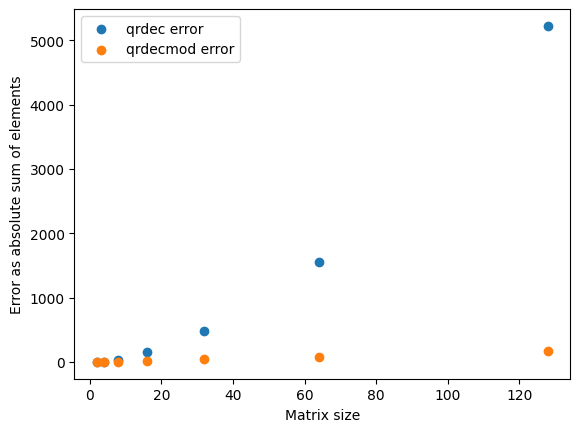

In [43]:
# 4d
# norm -> np.linalg.norm
# Range of sizes of the matrix A
k = np.array((2, 4, 8, 16, 32, 64, 128))

# YOUR CODE HERE
def orthoerror(Q):
    return np.sum(np.abs(Q@Q.T-np.identity(Q.shape[0])))

qrdecerr=[]
qrdecmoderr=[]
for i in range(len(k)):
    qrdecerr.append(orthoerror(qrdec(testcreate(k[i],21)[0])[0]))
    qrdecmoderr.append(orthoerror(qrdecmod(testcreate(k[i],21)[0])[0]))

plt.scatter(k,qrdecerr,label="qrdec error")
plt.scatter(k,qrdecmoderr,label="qrdecmod error")
plt.xlabel("Matrix size")
plt.ylabel("Error as absolute sum of elements")


plt.legend()
plt.show()


# Problem 5: Root finding (4 pt)

Find **all** the roots for the polynomial function:

\begin{equation}
P(x) = 23 x^6 + 2 x^5 - 13 x^3 + 20 x^2 - 11,
\end{equation}

In [ ]:
# YOUR CODE HERE
P = np.poly1d([23,2,0,-13,20,0,-11])
P.r

# Problem 6: Numerical Integration

Here, you will use two different methods of numerical integration to calculate the value of $\pi$ with a precision of $10^{-4}$. *You are not allowed to hardcode the value of $\pi$ or use the python definitions!!*

## Problem 6a: Simpson method (6 pt)
First do this using the Simpson method.
- Choose and define a function for which you know the integral contains $\pi$.
- Include a plot of  your function with the bounds of the integral you are going to use.
- Define the Simpson method, use adaptive integration (so increasingly higher number of panels $N$ which is the equivalent of smaller values of $h$) and use, for the stopping criteria, $\epsilon=10^{-4}$ (adaptive integration and the behaviour of $\epsilon_N$ for Simpson's rule are given in section 3 of the lecture notebook). Start with $N=1$.


In [ ]:
# YOUR CODE HERE
def pi_func(x): # Integrate from 0 to 1
    return 4*np.sqrt(1-x**2)
raise NotImplementedError()

## Problem 6b: Monte Carlo method (4 pt)

Now also solve for $\pi$ using a Monte Carlo method.
- Use the same function you defined before.
- Define a function called *montecarlo* uses your function and, the integration interval and the number of Monte Carlo samples as an input. Then use *np.random.seed* and *np.random.uniform* to determine the random sampling of your function and calculate the integral, and the associated error, as described in the lecture notes.
- Increase the number of Monte Carlo samples until the error $<10^{-4}$.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Problem 7: Approximation and Interpolation

This problem deals with the free fall of objects (see [Wikipedia](https://en.wikipedia.org/wiki/Free_fall)).

We have the following equation of motion for a body falling in air:

$$m \frac{dv}{dt} = mg - \frac{1}{2}\rho C_D A v^2$$

where $\rho$ is the air density and $C_D$ is the drag coefficient, here assumed to be constant.

The final velocity obtained is given by

$$v_\infty = \sqrt{\frac{2mg}{\rho C_D A}}$$

So that the above equation can be written (noting that $\frac{dv}{dt} = a$):

$$a = g - \frac{g}{v_\infty^2} v^2$$

which describes the the acceleration $a$ as a polynomial in $v$, with coefficients $[-\frac{g}{v_\infty^2}, 0, g]$.

Let's produce some simulated data. 

> I use the equations which can be found on the Wikipedia link given in the
> cell above.

In [ ]:
# just run this cell

# cover the first 50 seconds
N = 50
t = np.linspace(0.0, 20.0, N)

# the gravitational accelartion on Earth
g_true = 9.81

# the final velocity, which we will try to recover below
v_f_true = 56

# the resulting velocity profile
v = v_f_true * np.tanh(g_true*t/v_f_true)

# the resulting net acceleration with added noise
a = g_true - g_true*(v/v_f_true)**2 + 0.2*np.random.randn(N)

## Problem 7a (3 pt)

Produce a plot with two subplots, showing `v` and `a` against `t`, respectively. Add labels and legends.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problem 7b (5 pt)

We want to fit

$$a_i = c_0 + c_1 \cdot v_i^2 \quad {\rm for} \quad i = 0 \dots N-1$$

Set up the design matrix $\mathbf{D}$ for this problem, which here will be like a Vandermonde matrix, but with
the column for the first order of $v$ missing.

$$\mathbf{D} = \begin{pmatrix}
1 & v_0^2 \\
1 & v_1^2 \\
\vdots & \vdots \\
1 & v_{N-1}^2 \\
\end{pmatrix}$$

Construct the matrix $\mathbf{A} = \mathbf{D}^\mathbf{T} \mathbf{D}$ and the vector $b = \mathbf{V}^\mathbf{T} a$
and solve (e.g. by using `np.linalg.solve`) the set of linear equations given by

$$\mathbf{A} c = b$$

which will give you the vector $c$ with two components $c_0$ and $c_1$. 

We expect $c_0$ to give us the gravitational acceleration $g$ and $c_1$ to give us $-\frac{g}{v_\infty^2}$.

In [ ]:
# Calculate design matrix D
# D = ...

# calculate matrix A and right hand side b, using D
# A = 
# b = 

# solve system A * c = b for c
# c = ...           

# YOUR CODE HERE
raise NotImplementedError()

## Problem 7c (3 pt)

Now, given the coefficients, calculate $g$ and $v_\infty$ and compare with the *true* values used in the simulation 
of the data above, namely $g = 9.81 \frac{m}{s^2}$ and $v_\infty = 56 \frac{m}{s}$.

Calculate the deviations in percent between the values determined from the fit and the *true* values.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


## Problem 7d (3 pt)

Reproduce the plot from above, but now add the fitted acceleration profile to the plot.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Problem 8: Ordinary differential equations - Initial value problem

## Problem 8a (3 pt):
Define and use the backward Euler method to solve the following Riccati's equation:
$$
y'(x) = -\frac{30}{1-x^2} + \frac{2x}{1-x^2}y(x) - y^2(x), \quad y(0.05) = 19.53
$$
for $x$ ranging from $0.05$ to $0.49$ with $n=12$ steps.
As we've seen in the lecture, the backward Euler method implies to solve $y_{j+1} = y_j + hf(x_{j+1} , y_{j+1} )$, where $y_{j+1}$ is a root that must be found at each iteration (use any method you like).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problem 8b (4 pt):
Then solve again the equation, but with:
- RK4 (as seen in the lecture)
- the `odeint` function that you can import from `scipy.integrate`. Look at Scipy documentation for using that function. Use a finer resolution for the x axis (more $x$ values between 0.5 and 0.49, see `np.linspace` to create the $x$ values)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problem 8c (3 pt):
Finally, plot the results $y(x)$ of each method on the same graph and label them accordingly.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Problem 9: Simultaneous differential equations

The __[Lotka–Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)__, also known as the **predator–prey equations**, are a pair of first-order nonlinear differential equations, frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey.

Let's say $x(t)$ and $y(t)$ are the prey and predator populations, respectively, as a function of time. The model is a set of two simultaneous differential equations, defined as:
$$
x'(t) = \alpha x - \beta xy \\
y'(t) = -\gamma y + \delta xy 
$$
where primes denote derivative to time $t$ and $\alpha, \beta, \gamma, \delta$ are constants.

## Problem 9a (5 pt)
- Use RK4 to solve this system for $t=0$ to $100$ and $\alpha=0.1, \beta=0.01, \gamma=0.5, \delta=0.01$ and the initial conditions $x(0) = 60, y(0) = 20$. Use a rather large amount of steps, e.g. $n=200$.
- Then plot $x(t)$ and $y(t)$ on the same graph. Label the plot properly.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problem 9b (3pt)

If you haven't already, take some time to understand the concrete physical meaning of this system of equations, for both the prey and predator populations (no need to write anything). Then modify some of the parameters ($\alpha, \beta, \gamma, \delta$) to simulate an unbalanced ecosystem over the same time period $t=0$ to $100$. 

Plot again $x(t)$ and $y(t)$ for your new system. Label the plot properly.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()